
Processing train split...


Processing E:\InventoryManagement\Dataset\train\images: 100%|███████████████████████████████████████████████████████████████████| 29673/29673 [14:48<00:00, 33.38it/s]



Total corrupted files: 0
Total too small files (<30px): 0

Processing valid split...


Processing E:\InventoryManagement\Dataset\valid\images: 100%|█████████████████████████████████████████████████████████████████████| 2815/2815 [01:16<00:00, 36.81it/s]



Total corrupted files: 0
Total too small files (<30px): 0

Processing test split...


Processing E:\InventoryManagement\Dataset\test\images: 100%|██████████████████████████████████████████████████████████████████████| 1431/1431 [00:47<00:00, 30.38it/s]



Total corrupted files: 0
Total too small files (<30px): 0

Visualizing samples from train split...


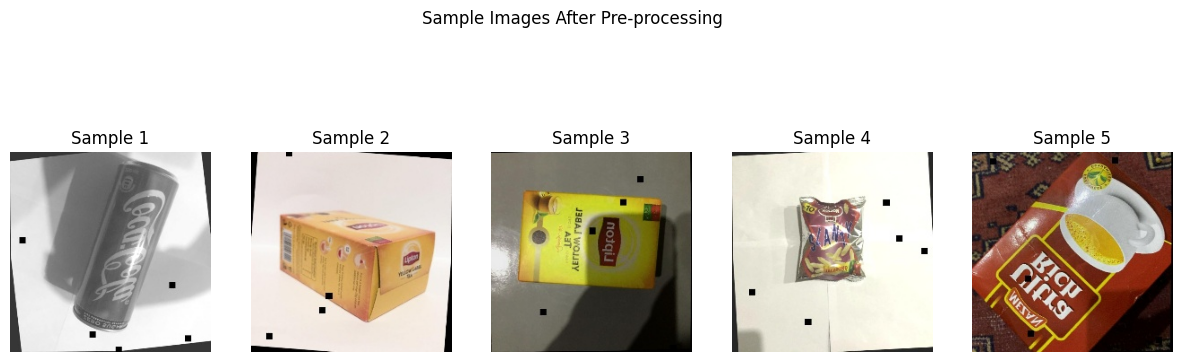


Plotting size distributions...


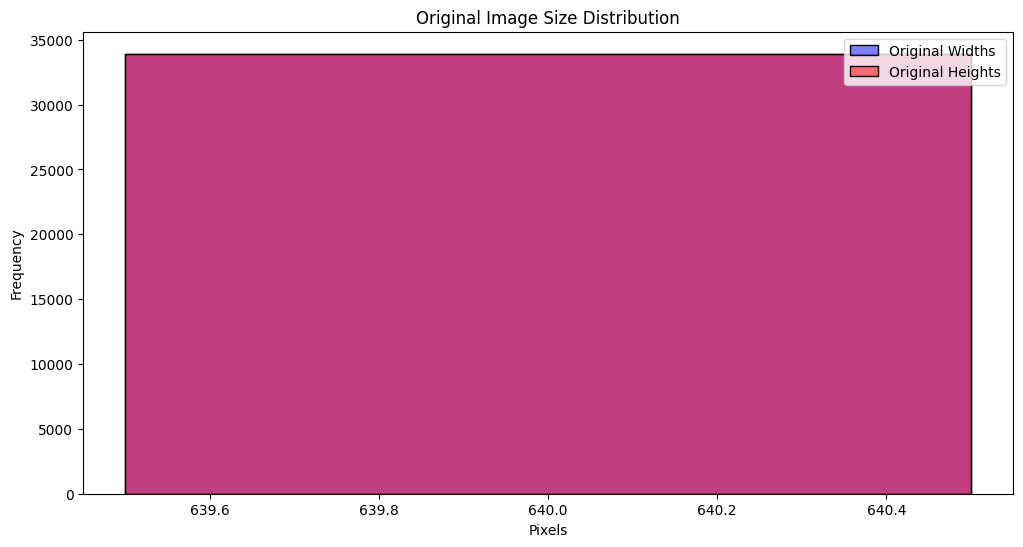

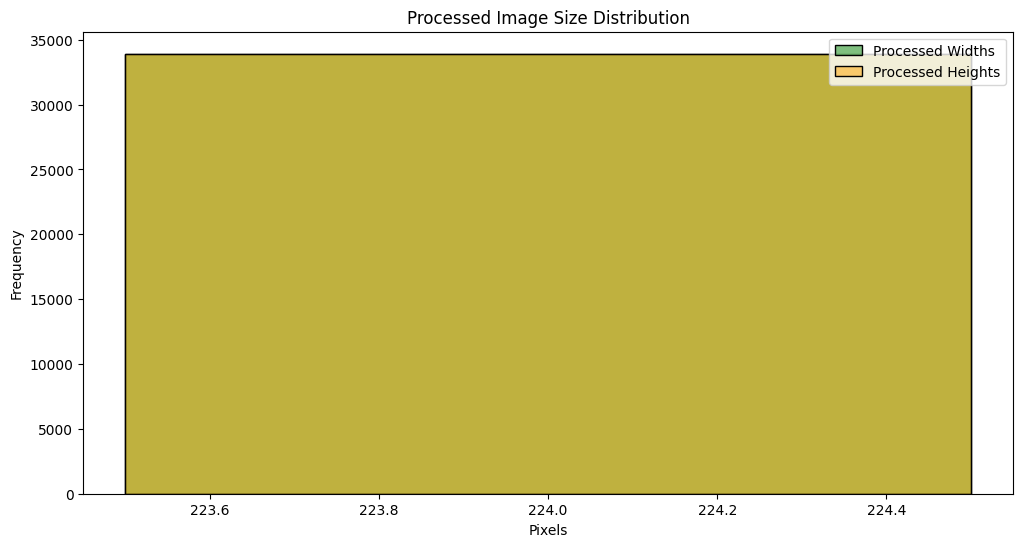


Plotting data distribution across splits...


C:\Users\ARHAM KHAN\AppData\Local\Temp\ipykernel_7748\645334505.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis")


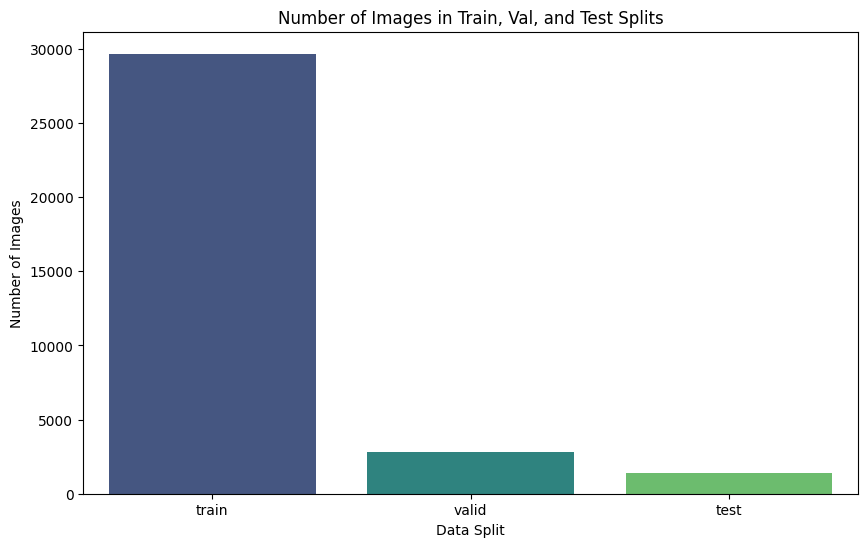

In [1]:
import os
import shutil
import random
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration: Paths and Constants
BASE_INPUT_DIR = "E:\\InventoryManagement\\Dataset" 
BASE_OUTPUT_DIR = "output" 
MIN_PIXEL_THRESHOLD = 30  # Minimum valid size (width or height)
TARGET_SIZE = (224, 224)  # Desired output size
SPLITS = ['train', 'valid', 'test']  # Dataset splits

# Create necessary output directories
for split in SPLITS:
    os.makedirs(os.path.join(BASE_OUTPUT_DIR, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(BASE_OUTPUT_DIR, split, 'labels'), exist_ok=True)


# Lists to store image size info for visualization
original_sizes = []
processed_sizes = []
image_counts = {split: 0 for split in SPLITS}

# Function: Validate Image
def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()  # Check for corruption
        img = Image.open(file_path)  # Reload to check dimensions
        return img.size[0] >= MIN_PIXEL_THRESHOLD and img.size[1] >= MIN_PIXEL_THRESHOLD
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return False
        
# Function: Pre-process Images (Resize and Save)
def preprocess_images(input_dir, output_dir):
    corrupted_files = []
    too_small_files = []
    for file in tqdm(os.listdir(input_dir), desc=f"Processing {input_dir}"):
        file_path = os.path.join(input_dir, file)

        if not is_valid_image(file_path):
            corrupted_files.append(file_path)
            continue
        # Load and resize valid images
        img = cv2.imread(file_path)
        original_sizes.append(img.shape[:2])  # Track original size
        if img.shape[0] < MIN_PIXEL_THRESHOLD or img.shape[1] < MIN_PIXEL_THRESHOLD:
            too_small_files.append(file_path)
            continue
        resized_img = cv2.resize(img, TARGET_SIZE)
        processed_sizes.append(resized_img.shape[:2])  # Track new size
        cv2.imwrite(os.path.join(output_dir, file), resized_img)
    # Reporting issues
    print(f"\nTotal corrupted files: {len(corrupted_files)}")
    print(f"Total too small files (<{MIN_PIXEL_THRESHOLD}px): {len(too_small_files)}")
    if corrupted_files:
        print("Corrupted files:", corrupted_files)
    if too_small_files:
        print("Too small files:", too_small_files)
# Function: Copy Labels Without Modification
def copy_labels(input_dir, output_dir):
    for label_file in os.listdir(input_dir):
        shutil.copy(os.path.join(input_dir, label_file), os.path.join(output_dir, label_file))

# Function: Visualize Sample Images
def show_image_samples(directory, num_samples=5):
    all_files = [os.path.join(directory, f) for f in os.listdir(directory)]

    sample_files = random.sample(all_files, min(num_samples, len(all_files)))  

    plt.figure(figsize=(15, 5))
    for idx, file_path in enumerate(sample_files):
        img = cv2.imread(file_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, idx + 1)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f'Sample {idx + 1}')
    plt.suptitle("Sample Images After Pre-processing")
    plt.show()


# Function: Plot Image Size Distributions
def plot_size_distribution(original_sizes, processed_sizes):
    # Original Sizes Distribution
    original_widths, original_heights = zip(*original_sizes)
    plt.figure(figsize=(12, 6))
    sns.histplot(original_widths, color='blue', label='Original Widths', kde=True)
    sns.histplot(original_heights, color='red', label='Original Heights', kde=True)
    plt.title("Original Image Size Distribution")
    plt.legend()
    plt.xlabel("Pixels")
    plt.ylabel("Frequency")
    plt.show()



    # Processed Sizes Distribution
    processed_widths, processed_heights = zip(*processed_sizes)
    plt.figure(figsize=(12, 6))
    sns.histplot(processed_widths, color='green', label='Processed Widths', kde=True)
    sns.histplot(processed_heights, color='orange', label='Processed Heights', kde=True)
    plt.title("Processed Image Size Distribution")
    plt.legend()
    plt.xlabel("Pixels")
    plt.ylabel("Frequency")
    plt.show()



# Function: Plot Number of Images in Each Split
def plot_data_distribution(image_counts):

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis")
    plt.title("Number of Images in Train, Val, and Test Splits")
    plt.xlabel("Data Split")
    plt.ylabel("Number of Images")
    plt.show()


# Main Function: Run Pre-processing for All Splits
def preprocess_dataset():
    for split in SPLITS:
        input_images_dir = os.path.join(BASE_INPUT_DIR, split, 'images')
        output_images_dir = os.path.join(BASE_OUTPUT_DIR, split, 'images')
        input_labels_dir = os.path.join(BASE_INPUT_DIR, split, 'labels')
        output_labels_dir = os.path.join(BASE_OUTPUT_DIR, split, 'labels')

        print(f"\nProcessing {split} split...")
        preprocess_images(input_images_dir, output_images_dir)
        copy_labels(input_labels_dir, output_labels_dir)


        # Count number of processed images for visualization
        image_counts[split] = len(os.listdir(output_images_dir))


    # Visualizations
    print("\nVisualizing samples from train split...")
    show_image_samples(os.path.join(BASE_OUTPUT_DIR, 'train', 'images'), num_samples=5)

    print("\nPlotting size distributions...")
    if original_sizes and processed_sizes:
        plot_size_distribution(original_sizes, processed_sizes)

    print("\nPlotting data distribution across splits...")
    plot_data_distribution(image_counts)



# Run the script
if __name__ == "__main__":
    preprocess_dataset()

In [1]:
import shutil
import os

# Define the source and destination directories
source_dir = '/kaggle/input/inventorymanagement'
destination_dir = '/kaggle/working/Dataset'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy each folder from the source to the destination
for folder in os.listdir(source_dir):
    src_folder = os.path.join(source_dir, folder)
    dest_folder = os.path.join(destination_dir, folder)
    
    if os.path.isdir(src_folder):  # Ensure it's a directory
        shutil.copytree(src_folder, dest_folder)

In [2]:
%%capture
!pip install ultralytics
!pip install pyyaml

In [3]:
import yaml

# Step 1: Load the existing YAML file
with open('/kaggle/working/Dataset/Dataset/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Step 2: Update the paths (example new paths)
data['train'] = '/kaggle/working/Dataset/Dataset/train'
data['val'] = '/kaggle/working/Dataset/Dataset/valid'
data['test'] = '/kaggle/working/Dataset/Dataset/test'

# Step 3: Save the updated YAML file
with open('data.yaml', 'w') as file:
    yaml.dump(data, file)

print("Updated paths in data.yaml successfully!")


Updated paths in data.yaml successfully!


In [4]:
import yaml

# Step 1: Load the existing YAML file
with open('/kaggle/working/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Step 2: Remove the specified keys
keys_to_remove = ['roboflow']  # Add more keys if needed
for key in keys_to_remove:
    if key in data:
        del data[key]

# Step 3: Save the updated YAML file
with open('/kaggle/working/data.yaml', 'w') as file:
    yaml.dump(data, file)

print("Removed specified keys from data.yaml successfully!")


Removed specified keys from data.yaml successfully!


In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
Model=YOLO("yolo11n.pt")
Model.train(data="/kaggle/working/data.yaml",imgsz=64,epochs=30)

100%|██████████| 5.35M/5.35M [00:00<00:00, 22.2MB/s]


Ultralytics 8.3.19 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 4.58MB/s]
2024-10-22 13:44:39,897	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-22 13:44:40,872	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /kaggle/working/Dataset/Dataset/train/labels... 29673 images, 6 backgrounds, 0 corrupt: 100%|██████████| 29673/29673 [00:27<00:00, 1098.10it/s]


train: New cache created: /kaggle/working/Dataset/Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/Dataset/Dataset/valid/labels... 2815 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2815/2815 [00:02<00:00, 1137.23it/s]


val: New cache created: /kaggle/working/Dataset/Dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30     0.206G      1.523        4.2      1.194         22         64: 100%|██████████| 1855/1855 [03:06<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:11<00:00,  7.57it/s]


                   all       2815       2816      0.196      0.494       0.24      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30     0.164G        1.4      2.136      1.143         22         64: 100%|██████████| 1855/1855 [02:53<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.47it/s]


                   all       2815       2816      0.526       0.72      0.648      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30     0.161G      1.384      1.859      1.133         21         64: 100%|██████████| 1855/1855 [02:45<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.28it/s]


                   all       2815       2816      0.569      0.721      0.732      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30     0.164G      1.349      1.737      1.121         22         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.45it/s]


                   all       2815       2816      0.769       0.79      0.877      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30     0.159G      1.272      1.584      1.095         21         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.60it/s]

                   all       2815       2816      0.846      0.863      0.929      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30     0.159G      1.225      1.478      1.082         20         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.56it/s]


                   all       2815       2816        0.9      0.868      0.944      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30     0.159G      1.201      1.408      1.072         21         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.45it/s]


                   all       2815       2816      0.898       0.91      0.967      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30     0.161G      1.174      1.338      1.066         27         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.59it/s]

                   all       2815       2816      0.886      0.871      0.947      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30     0.159G      1.152      1.288      1.058         15         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.30it/s]


                   all       2815       2816      0.917      0.899      0.963      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30     0.161G      1.136      1.246      1.052         17         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.49it/s]


                   all       2815       2816      0.917      0.918      0.969      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30     0.159G      1.122      1.205      1.047         24         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.58it/s]


                   all       2815       2816      0.918       0.93      0.972      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30     0.159G      1.112      1.182      1.044         21         64: 100%|██████████| 1855/1855 [02:42<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.53it/s]


                   all       2815       2816      0.844      0.845      0.918      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30     0.159G      1.094      1.143      1.039         24         64: 100%|██████████| 1855/1855 [02:42<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.69it/s]

                   all       2815       2816      0.877      0.898       0.95      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30     0.159G      1.085      1.116      1.034         18         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.66it/s]

                   all       2815       2816      0.909      0.922      0.964      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30     0.159G      1.078      1.099      1.032         22         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.67it/s]


                   all       2815       2816      0.953      0.948      0.984      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30     0.159G      1.064       1.08      1.029         27         64: 100%|██████████| 1855/1855 [02:43<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.56it/s]

                   all       2815       2816      0.953      0.955      0.983      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30     0.159G      1.057      1.051      1.026         27         64: 100%|██████████| 1855/1855 [02:42<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.71it/s]

                   all       2815       2816      0.938       0.95      0.981      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30     0.159G      1.047       1.04      1.024         18         64: 100%|██████████| 1855/1855 [02:42<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.48it/s]


                   all       2815       2816      0.912      0.923      0.963       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30     0.159G      1.044      1.025      1.022         18         64: 100%|██████████| 1855/1855 [02:47<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.49it/s]

                   all       2815       2816      0.934      0.944      0.974      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30     0.159G      1.031     0.9997      1.018         20         64: 100%|██████████| 1855/1855 [02:47<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.40it/s]

                   all       2815       2816      0.932      0.955      0.974      0.725


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30     0.159G     0.8764     0.6514     0.9766          9         64: 100%|██████████| 1855/1855 [02:46<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:09<00:00,  8.86it/s]

                   all       2815       2816      0.982      0.975      0.991      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30     0.159G     0.8539     0.6115     0.9698          9         64: 100%|██████████| 1855/1855 [02:36<00:00, 11.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:09<00:00,  8.97it/s]

                   all       2815       2816       0.99      0.983      0.993       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30     0.159G     0.8402     0.5838      0.964          9         64: 100%|██████████| 1855/1855 [02:37<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.72it/s]

                   all       2815       2816      0.991      0.985      0.993      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30     0.159G     0.8255     0.5641     0.9586          9         64: 100%|██████████| 1855/1855 [02:40<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:09<00:00,  8.89it/s]

                   all       2815       2816      0.991      0.985      0.993      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30     0.157G     0.8125     0.5422     0.9543          9         64: 100%|██████████| 1855/1855 [02:36<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:09<00:00,  8.86it/s]

                   all       2815       2816      0.991      0.987      0.994      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30     0.157G     0.8079     0.5307     0.9516          9         64: 100%|██████████| 1855/1855 [02:42<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.79it/s]

                   all       2815       2816      0.992      0.986      0.994      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30     0.157G     0.7937     0.5091     0.9476          9         64: 100%|██████████| 1855/1855 [02:41<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.79it/s]

                   all       2815       2816      0.992      0.987      0.994      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30     0.157G     0.7828      0.496     0.9437          9         64: 100%|██████████| 1855/1855 [02:41<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.75it/s]

                   all       2815       2816      0.992      0.988      0.994      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30     0.159G     0.7714     0.4798      0.942          9         64: 100%|██████████| 1855/1855 [02:39<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.79it/s]

                   all       2815       2816      0.992      0.988      0.994      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30     0.159G      0.765     0.4691       0.94          9         64: 100%|██████████| 1855/1855 [02:41<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:09<00:00,  8.91it/s]

                   all       2815       2816      0.992      0.989      0.994      0.798



30 epochs completed in 1.460 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.19 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:10<00:00,  8.18it/s]


                   all       2815       2816      0.992      0.989      0.994      0.799
Bisconni Chocolate Chip Cookies 46.8gm        118        118      0.989          1      0.995      0.823
   Coca Cola Can 250ml        120        121      0.983      0.975      0.988      0.768
Colgate Maximum Cavity Protection 75gm        130        130      0.994          1      0.995      0.755
           Fanta 500ml        117        117      0.977      0.991      0.995      0.807
Fresher Guava Nectar 500ml         94         94      0.998          1      0.995      0.797
Fruita Vitals Red Grapes 200ml         95         95      0.998          1      0.995        0.8
   Islamabad Tea 238gm        103        103      0.991          1      0.995      0.835
Kolson Slanty Jalapeno 18gm        127        127      0.999          1      0.995      0.788
Kurkure Chutney Chaska 62gm        115        115      0.997          1      0.995      0.845
 LU Candi Biscuit 60gm        120        120      0.989 

lr/pg0,▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg1,▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▁▅▆▇▇██████▇██████████████████
metrics/mAP50-95(B),▁▄▄▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██████████
metrics/precision(B),▁▄▄▆▇▇▇▇▇▇▇▇▇▇███▇▇▇██████████
metrics/recall(B),▁▄▄▅▆▆▇▆▇▇▇▆▇▇▇█▇▇▇███████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇▆▆▅▅▅▅▄▄▄▄▄▄▄▄▄▄▃▂▂▂▂▁▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a7a9d72b2e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  

In [7]:
Model.val()

Ultralytics 8.3.19 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/working/Dataset/Dataset/valid/labels.cache... 2815 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2815/2815 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 176/176 [00:12<00:00, 14.37it/s]


                   all       2815       2816      0.992      0.989      0.994      0.798
Bisconni Chocolate Chip Cookies 46.8gm        118        118      0.989          1      0.995      0.823
   Coca Cola Can 250ml        120        121      0.983      0.975      0.988      0.768
Colgate Maximum Cavity Protection 75gm        130        130      0.994          1      0.995      0.751
           Fanta 500ml        117        117      0.976      0.991      0.995      0.806
Fresher Guava Nectar 500ml         94         94      0.998          1      0.995      0.799
Fruita Vitals Red Grapes 200ml         95         95      0.998          1      0.995        0.8
   Islamabad Tea 238gm        103        103      0.991          1      0.995      0.832
Kolson Slanty Jalapeno 18gm        127        127      0.999          1      0.995      0.787
Kurkure Chutney Chaska 62gm        115        115      0.997          1      0.995      0.847
 LU Candi Biscuit 60gm        120        120      0.989 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a7b4dbbf760>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  

In [8]:
import pandas as pd
df=pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,204.278,1.52342,4.20015,1.19368,0.19616,0.49391,0.24012,0.16223,1.15626,2.34073,1.02893,0.003332,0.003332,0.003332
1,2,389.765,1.39982,2.13598,1.14279,0.52576,0.72019,0.64776,0.43393,1.13628,1.44490,1.02088,0.006445,0.006445,0.006445
2,3,566.940,1.38390,1.85891,1.13318,0.56941,0.72136,0.73192,0.46453,1.23229,1.48703,1.05342,0.009338,0.009338,0.009338
3,4,741.972,1.34886,1.73679,1.12072,0.76887,0.79006,0.87657,0.56149,1.22492,1.03601,1.04983,0.009010,0.009010,0.009010
4,5,916.147,1.27231,1.58360,1.09522,0.84601,0.86281,0.92945,0.65401,1.04311,0.82336,0.97946,0.008680,0.008680,0.008680
5,6,1090.960,1.22507,1.47786,1.08180,0.90022,0.86790,0.94362,0.65584,1.05767,0.77463,0.98454,0.008350,0.008350,0.008350
6,7,1265.530,1.20064,1.40768,1.07202,0.89751,0.90972,0.96686,0.65683,1.11668,0.73494,0.99640,0.008020,0.008020,0.008020
7,8,1439.830,1.17440,1.33836,1.06551,0.88585,0.87132,0.94681,0.68209,1.02178,0.76281,0.97246,0.007690,0.007690,0.007690
8,9,1614.860,1.15215,1.28834,1.05829,0.91684,0.89873,0.96266,0.67848,1.04586,0.72506,0.97502,0.007360,0.007360,0.007360
9,10,1790.080,1.13646,1.24613,1.05234,0.91742,0.91776,0.96872,0.70749,0.97333,0.64113,0.94754,0.007030,0.007030,0.007030


In [9]:
df.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

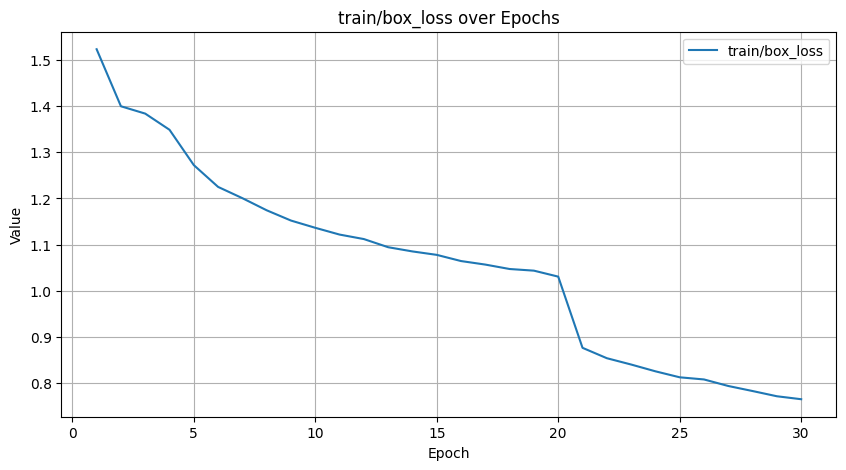

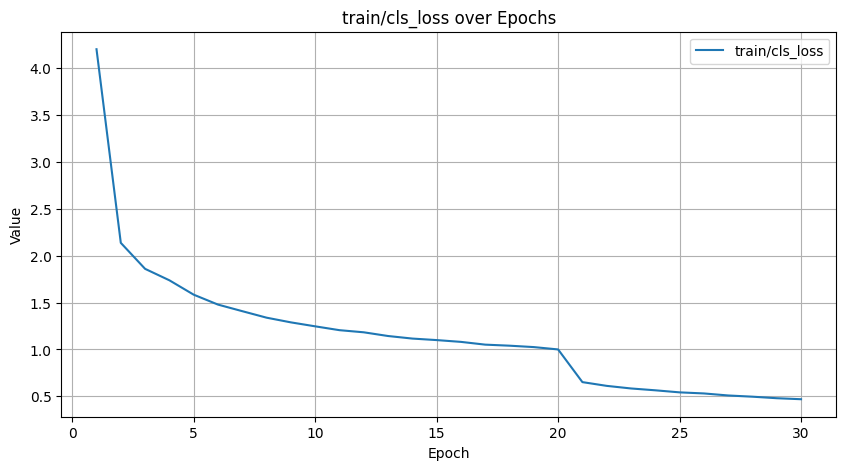

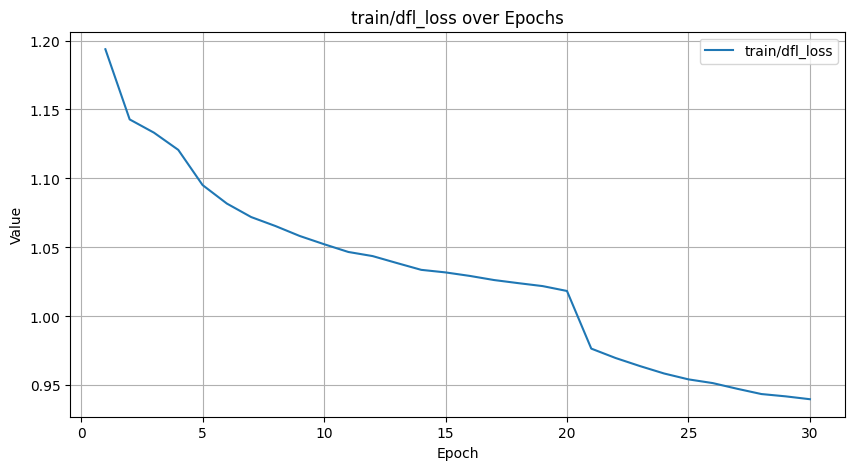

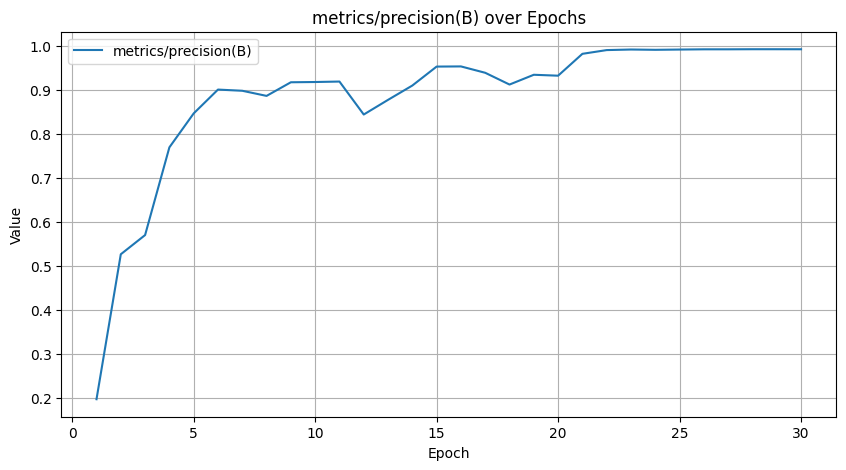

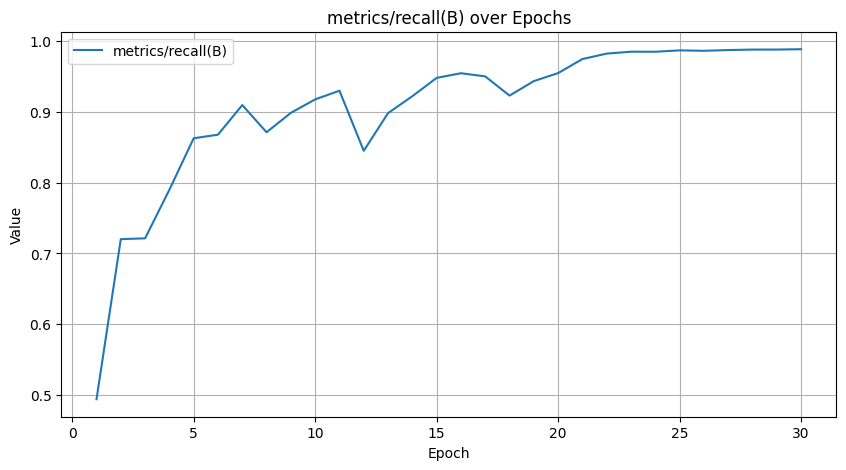

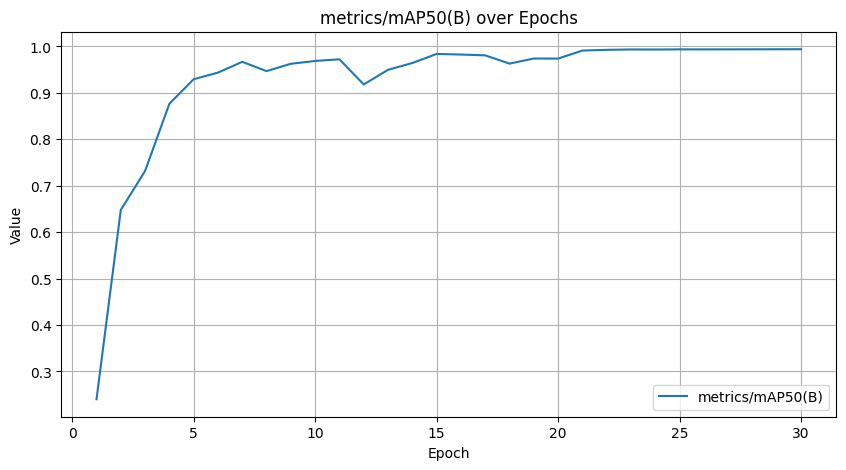

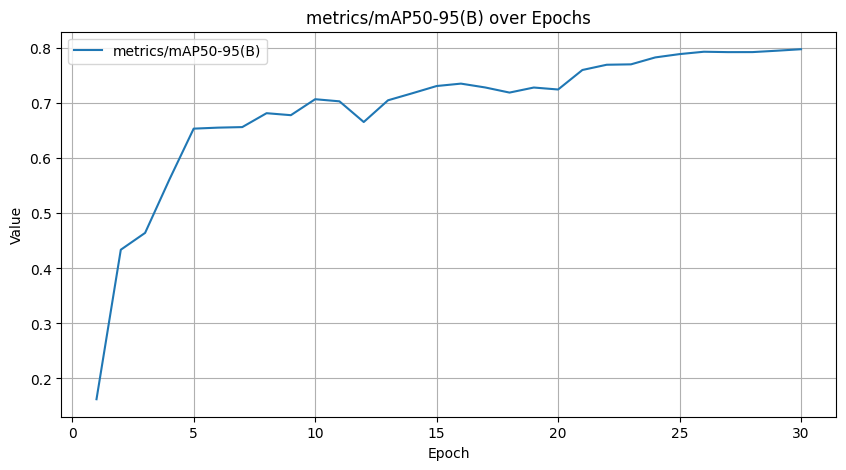

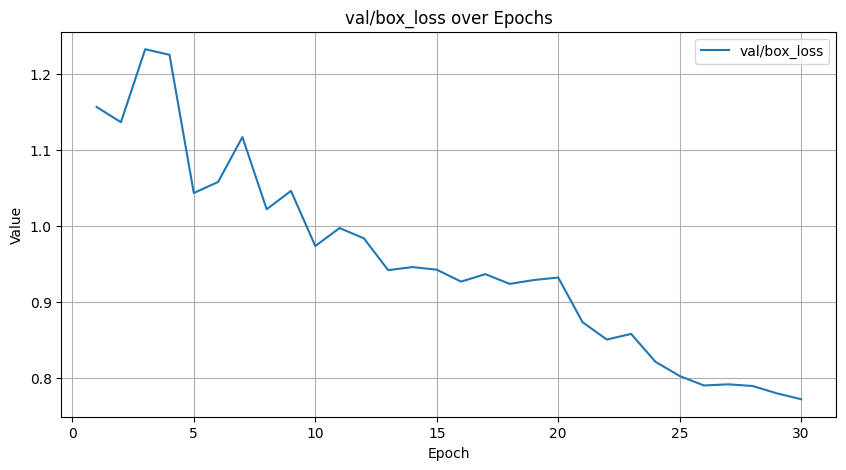

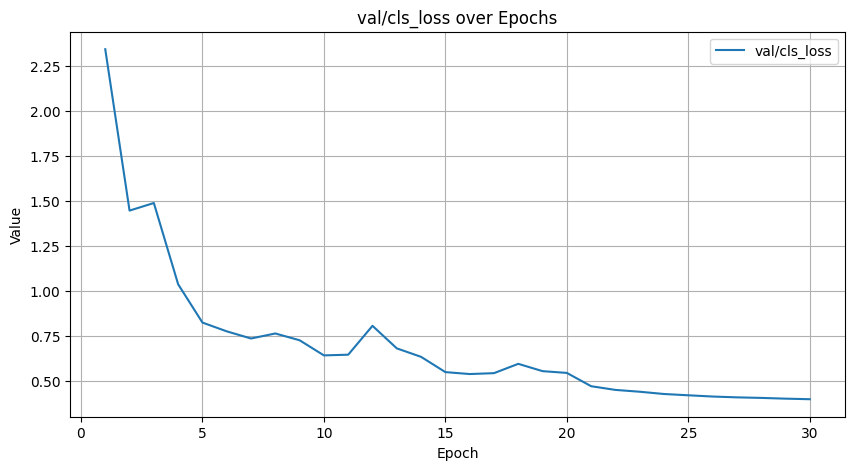

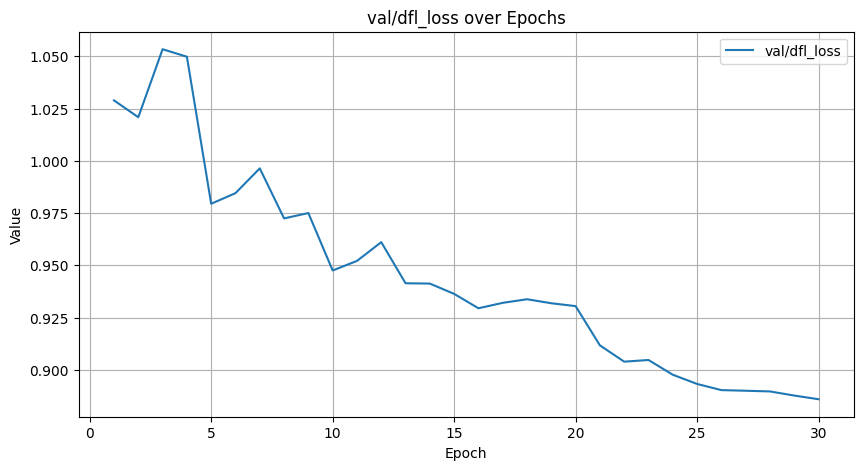

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
# df = pd.read_csv('result.csv')

# Set the epoch column as the x-axis
epochs = df['epoch']

# List of metrics to plot (excluding learning rates)
metrics = [
    'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
    'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 
    'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss'
]

# Create separate subplots for each metric
for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, df[metric], label=metric)
    plt.title(f'{metric} over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


In [5]:
from ultralytics import YOLO

In [6]:
Model=YOLO("D:\\best.pt")

In [7]:
Model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [5]:
import os
path="D:\\test"
for image in os.listdir(path):
    image_path=os.path.join(path,image)

    Model(image_path,save=True)


image 1/1 D:\test\IMG_0055_jpg.rf.0021c9caea160c670afd34dabb397a0e.jpg: 64x64 1 Fruita Vitals Red Grapes 200ml, 45.6ms
Speed: 0.0ms preprocess, 45.6ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs\detect\predict

image 1/1 D:\test\IMG_0068_jpg.rf.99856709f58457e9235cf2fb32a372a8.jpg: 64x64 1 Fruita Vitals Red Grapes 200ml, 34.6ms
Speed: 0.0ms preprocess, 34.6ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs\detect\predict

image 1/1 D:\test\IMG_0080_jpg.rf.a82d3a3e686d4d628fc396b2e3b30afb.jpg: 64x64 1 Fruita Vitals Red Grapes 200ml, 40.6ms
Speed: 0.0ms preprocess, 40.6ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs\detect\predict

image 1/1 D:\test\IMG_0081_jpg.rf.a1499647cfeabbfab74f6c5c710cb1ea.jpg: 64x64 1 Fruita Vitals Red Grapes 200ml, 24.0ms
Speed: 0.0ms preprocess, 24.0ms inference, 8.0ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs\detect\

In [8]:
import cv2
Model("D:\\l.jpg",show=True)
cv2.waitKey(0)


image 1/1 D:\l.jpg: 64x64 (no detections), 30.6ms
Speed: 0.0ms preprocess, 30.6ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


113

: 

In [4]:
a=r"\/\/\/\/\/\/"
a

'\\/\\/\\/\\/\\/\\/'